<a href="https://colab.research.google.com/github/joao0812/PythonPandas_Anotacoes/blob/main/PythonPandasDIOBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Importando a biblioteca Pandas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [31]:
# Upload dos arquivos
from google.colab import files
arq = files.upload()

In [32]:
# Criando o DataFrame
df = pd.read_excel("/content/dataset/AdventureWorks.xlsx")

In [33]:
# Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [34]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [35]:
# Verificando os tipos dos dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [36]:
# Qual a receita total ?
df['Valor Venda'].sum()

5984606.1426

In [39]:
# Qaul o custo Total ?
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade']) # Criando coluna Custo

In [41]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [45]:
# Qual o custo Total ?
round(df['Custo'].sum(), 2)

2486783.05

In [47]:
# Qual o Lucro Total ?
df['Lucro'] = df['Valor Venda'] - df['Custo'] # Criando a coluna Lucro

In [48]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [50]:
# Qual o Lucro Total ?
round(df['Lucro'].sum(), 2)

3497823.09

In [60]:
# Total de dias para enviar o produto
df['Tempo_envio'] = df['Data Envio'] - df['Data Venda']

In [62]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [64]:
# Extraindo apenas os dias
df['Tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days # Convertendo data apra int64

In [65]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [66]:
# Média do tempo de envio por Marca
df.groupby('Marca')['Tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [68]:
# Verificando se temos dados faltantes na nossa base de dados
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

In [76]:
# Descobrindo o Lucro por ano e por marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [99]:
pd.options.display.float_format = '{:20,.2f}'.format # Alterando a forma como o Pandas exibe os números Floats

In [80]:
# Resetando o Index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index() # Ao resetar o Index, tras os dados de forma colunar para possíveis atividades
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [84]:
# Qual o total de produtos vendidos ?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

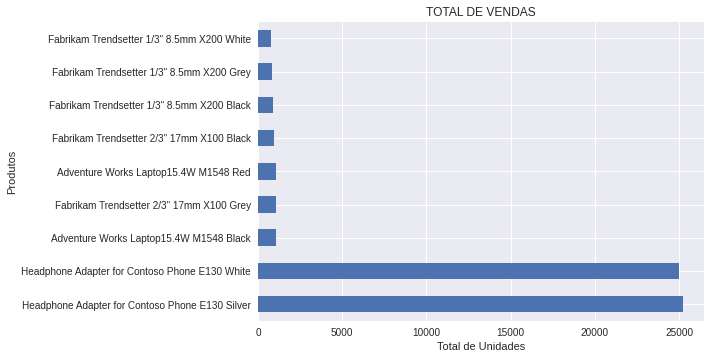

In [95]:
# Gráfico de total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).plot.barh(title='TOTAL DE VENDAS');
plt.xlabel('Total de Unidades')
plt.ylabel('Produtos');

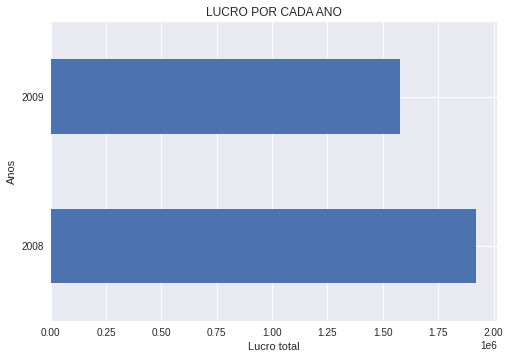

In [100]:
# Gráfico de total de Lucro por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().sort_values(ascending=False).plot.barh(title='LUCRO POR CADA ANO');
plt.xlabel('Lucro total')
plt.ylabel('Anos');

In [101]:
# Selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [102]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Mês')

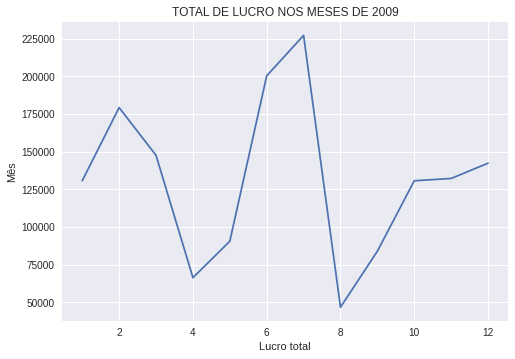

In [107]:
# Lucro por mês do ano de 2009
df_2009.groupby(df['Data Venda'].dt.month)['Lucro'].sum().plot(title='TOTAL DE LUCRO NOS MESES DE 2009')
plt.xlabel('Lucro total')
plt.ylabel('Mês')

Text(0, 0.5, 'Marcas')

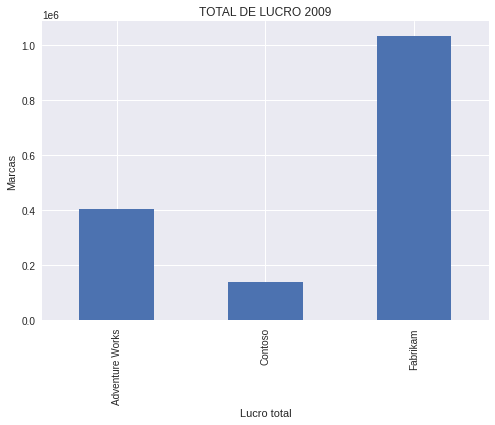

In [109]:
# Lucro por marca do ano de 2009
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='TOTAL DE LUCRO 2009')
plt.xlabel('Lucro total')
plt.ylabel('Marcas')

Text(0, 0.5, 'Classes')

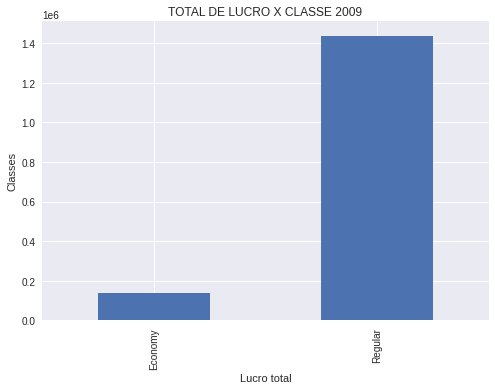

In [111]:
# Lucro por classe do ano de 2009
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='TOTAL DE LUCRO X CLASSE 2009')
plt.xlabel('Lucro total')
plt.ylabel('Classes')

In [112]:
# Análise sobre o tempo de envio
df['Tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

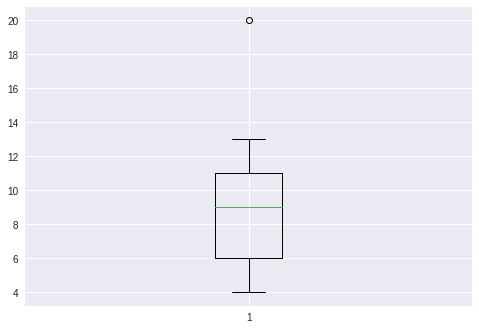

In [114]:
# Gráfico de Boxplot
plt.boxplot(df['Tempo_envio']);

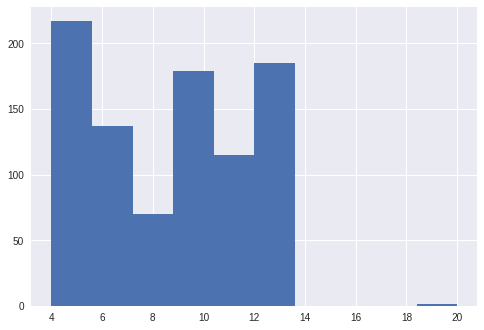

In [116]:
# Gráfico Histograma
plt.hist(df['Tempo_envio']);

In [117]:
# Tempo mínimo de envio
df['Tempo_envio'].min()

4

In [118]:
# Tempo máximo de envio
df['Tempo_envio'].max()

20

In [119]:
df[df['Tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
